# Checks for the correctness of the triadic closure code. 

In [9]:
import pandas as pd
import os

In [4]:
# Let us first read the filtered_sample file for reading RetractionYear
indir = "/Users/sm9654/desktop/NYUAD/nyuad-research/retraction_openalex/retraction_effects_on_academic_careers/data/processed/"
indir_matching = indir+"/author_matching/"

df_filtered = pd.read_csv(indir+"RW_authors_w_confounders_filteredSample_postNHB_BedoorsCorrections_Augmented.csv",
                        usecols=['Record ID','RetractionYear']).\
                            drop_duplicates()

# Now let us read the MAGAIDs (and MatchMAGAIDs)
df10_magaids = pd.read_csv(indir_matching+"/closestAverageMatch_tolerance_0.1_w_0.8.csv",
                        usecols=['MAGAID','MatchMAGAID','Record ID']).\
                            drop_duplicates().\
                                merge(df_filtered, on='Record ID')

df20_magaids = pd.read_csv(indir_matching+"/closestAverageMatch_tolerance_0.2_w_0.8.csv",
                        usecols=['MAGAID','MatchMAGAID','Record ID']).\
                            drop_duplicates().\
                                merge(df_filtered, on='Record ID')

df30_magaids = pd.read_csv(indir_matching+"/closestAverageMatch_tolerance_0.3_w_0.8.csv",
                        usecols=['MAGAID','MatchMAGAID','Record ID']).\
                            drop_duplicates().\
                                merge(df_filtered, on='Record ID')

# Processing 10%
df10_magaids_t = df10_magaids[['MAGAID','RetractionYear','Record ID']].drop_duplicates()
df10_magaids_c = df10_magaids[['MatchMAGAID','RetractionYear','Record ID']].drop_duplicates().\
                                    rename(columns={'MatchMAGAID':'MAGAID'})

df10_magaids_t['ScientistType'] = 'retracted'
df10_magaids_c['ScientistType'] = 'matched'

# Processing 20%
df20_magaids_t = df20_magaids[['MAGAID','RetractionYear','Record ID']].drop_duplicates()
df20_magaids_c = df20_magaids[['MatchMAGAID','RetractionYear','Record ID']].drop_duplicates().\
                                    rename(columns={'MatchMAGAID':'MAGAID'})

df20_magaids_t['ScientistType'] = 'retracted'
df20_magaids_c['ScientistType'] = 'matched'

# Processing 30%
df30_magaids_t = df30_magaids[['MAGAID','RetractionYear','Record ID']].drop_duplicates()
df30_magaids_c = df30_magaids[['MatchMAGAID','RetractionYear','Record ID']].drop_duplicates().\
                                    rename(columns={'MatchMAGAID':'MAGAID'})

df30_magaids_t['ScientistType'] = 'retracted'
df30_magaids_c['ScientistType'] = 'matched'

# Now we have list of all matched treatment and control alongside retraction year
# Note: Control can be one to many i.e. one matched to multiple 
# Note: This is now sorted in ascending order
df_matched = pd.concat([df10_magaids_t,df10_magaids_c,
                        df20_magaids_t,df20_magaids_c,
                        df30_magaids_t,df30_magaids_c]).\
                                        drop_duplicates().\
                                            sort_values(by='MAGAID')

df_matched.MAGAID.nunique()

6540

In [6]:
df_matched

,MAGAID,RetractionYear,Record ID,ScientistType
275,1.936235e+06,2012.0,4934.0,matched
0,2.184860e+06,2008.0,15835.0,retracted
3166,5.440459e+06,2010.0,702.0,matched
853,7.534684e+06,2014.0,3349.0,matched
2,8.197726e+06,2012.0,3444.0,retracted
...,...,...,...,...
4051,3.174844e+09,2014.0,17239.0,retracted
3395,3.175436e+09,2015.0,18203.0,retracted
2415,3.176126e+09,2004.0,4333.0,retracted
1376,3.176346e+09,2011.0,4464.0,matched


In [7]:
df_matched[df_matched['ScientistType']=='matched']['MAGAID'].nunique()

4192

In [8]:
df_matched[df_matched['ScientistType']=='retracted']['MAGAID'].nunique()

2348

In [11]:
# Now let us read triadic closure files

triadic_closure_path = indir_matching+"/triadic_closure/"

flist = os.listdir(triadic_closure_path)

dfs = []
for f in flist:
    df = pd.read_csv(triadic_closure_path+f, usecols=['MAGAID','NumOpenTriads','RetractionYear','NumTriadsClosed','NC'])
    dfs.append(df)
    
df_triads = pd.concat(dfs)

df_triads.head()


,MAGAID,RetractionYear,NumOpenTriads,NumTriadsClosed,NC
0,2.643648e+09,2013.0,20,0,0.0
1,2.643749e+09,2014.0,33,0,0.0
2,2.643908e+09,2015.0,119,0,0.0
3,2.644173e+09,2015.0,79,0,0.0
4,2.644200e+09,2010.0,147,0,0.0


In [19]:
df_triads['NC'].describe()

count    6542.000000
mean        0.020032
std         0.066726
min         0.000000
25%         0.000000
50%         0.000000
75%         0.008256
max         1.000000
Name: NC, dtype: float64

In [21]:
df_triads['NC'].describe()

count    6542.000000
mean        0.020032
std         0.066726
min         0.000000
25%         0.000000
50%         0.000000
75%         0.008256
max         1.000000
Name: NC, dtype: float64

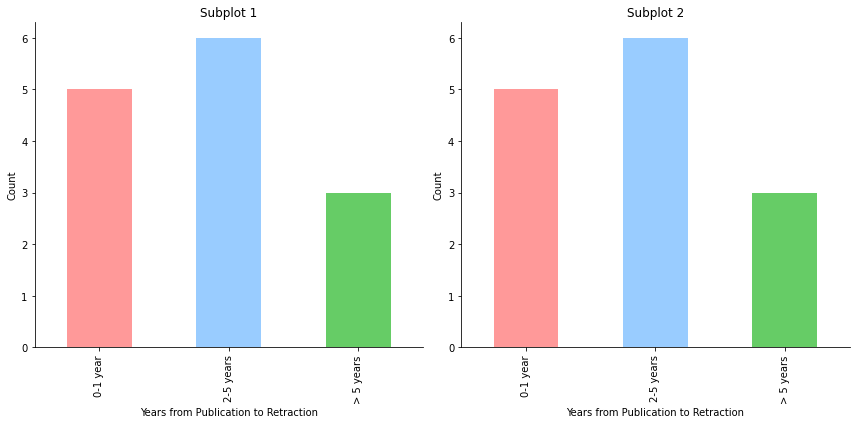

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data - replace this with your actual DataFrame
data = {
    'DifferencePublicationAndRetractionYear': [0, 1, 2, 3, 6, 10, 4, 1, 2, 3, 7, 5, 0, 0]
}
df = pd.DataFrame(data)

# Function to categorize the years into bins
def categorize_years(year):
    if year <= 1:
        return '0-1 year'
    elif 2 <= year <= 5:
        return '2-5 years'
    else:
        return '> 5 years'

# Apply categorization
df['Category'] = df['DifferencePublicationAndRetractionYear'].apply(categorize_years)

# Define colors for each category
colors = ['#ff9999', '#99ccff', '#66cc66']  # Light red, light blue, light green

# Plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust size as needed

for i, ax in enumerate(axs):
    # Count the occurrences of each category
    category_counts = df['Category'].value_counts().reindex(['0-1 year', '2-5 years', '> 5 years'], fill_value=0)
    category_counts.plot(kind='bar', ax=ax, color=colors)

    # Removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_title(f'Subplot {i+1}')
    ax.set_xlabel('Years from Publication to Retraction')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()
